In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import tensorflow as tf

In [5]:
df = pd.read_csv('../Data/pima-indians-diabetes.csv', header = None)
df

,0,1,2,3,4,5,6,7,8
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       768 non-null    int64  
 1   1       768 non-null    int64  
 2   2       768 non-null    int64  
 3   3       768 non-null    int64  
 4   4       768 non-null    int64  
 5   5       768 non-null    float64
 6   6       768 non-null    float64
 7   7       768 non-null    int64  
 8   8       768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [39]:
y = df.values[:, 8]
x = df.values[:, :8]

In [40]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
x_sc = scaler.fit_transform(x)

In [41]:
x_sc

array([[0.35294118, 0.74371859, 0.59016393, ..., 0.50074516, 0.23441503,
        0.48333333],
       [0.05882353, 0.42713568, 0.54098361, ..., 0.39642325, 0.11656704,
        0.16666667],
       [0.47058824, 0.91959799, 0.52459016, ..., 0.34724292, 0.25362938,
        0.18333333],
       ...,
       [0.29411765, 0.6080402 , 0.59016393, ..., 0.390462  , 0.07130658,
        0.15      ],
       [0.05882353, 0.63316583, 0.49180328, ..., 0.4485842 , 0.11571307,
        0.43333333],
       [0.05882353, 0.46733668, 0.57377049, ..., 0.45305514, 0.10119556,
        0.03333333]])

In [42]:
print(x_sc.shape)
print(y.shape)

(768, 8)
(768,)


In [43]:
model = Sequential()
model.add(Dense(128, input_dim = 8, activation = 'relu'))
model.add(Dense(86, activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(48, activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(1, activation = 'sigmoid'))
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 128)               1152      
                                                                 
 dense_13 (Dense)            (None, 86)                11094     
                                                                 
 dropout_2 (Dropout)         (None, 86)                0         
                                                                 
 dense_14 (Dense)            (None, 48)                4176      
                                                                 
 dropout_3 (Dropout)         (None, 48)                0         
                                                                 
 dense_15 (Dense)            (None, 1)                 49        
                                                                 
Total params: 16,471
Trainable params: 16,471
Non-trai

In [44]:
model.compile(loss = 'binary_crossentropy', metrics = ['accuracy'], optimizer = 'adam')

In [45]:
hist = model.fit(x_sc, y, validation_split=0.2, epochs = 100, batch_size = 20)

Epoch 1/100
31/31 [==============================] - 0s 4ms/step - loss: 0.6637 - accuracy: 0.6384 - val_loss: 0.6539 - val_accuracy: 0.6429
Epoch 2/100
31/31 [==============================] - 0s 2ms/step - loss: 0.6470 - accuracy: 0.6596 - val_loss: 0.6336 - val_accuracy: 0.6299
Epoch 3/100
31/31 [==============================] - 0s 2ms/step - loss: 0.6245 - accuracy: 0.6710 - val_loss: 0.6081 - val_accuracy: 0.6364
Epoch 4/100
31/31 [==============================] - 0s 2ms/step - loss: 0.5840 - accuracy: 0.7134 - val_loss: 0.5587 - val_accuracy: 0.7857
Epoch 5/100
31/31 [==============================] - 0s 2ms/step - loss: 0.5590 - accuracy: 0.7296 - val_loss: 0.5468 - val_accuracy: 0.6494
Epoch 6/100
31/31 [==============================] - 0s 1ms/step - loss: 0.5334 - accuracy: 0.7345 - val_loss: 0.5109 - val_accuracy: 0.7208
Epoch 7/100
31/31 [==============================] - 0s 2ms/step - loss: 0.5277 - accuracy: 0.7264 - val_loss: 0.5169 - val_accuracy: 0.7013
Epoch 8/100
3

Epoch 59/100
31/31 [==============================] - 0s 2ms/step - loss: 0.3717 - accuracy: 0.8241 - val_loss: 0.5065 - val_accuracy: 0.7987
Epoch 60/100
31/31 [==============================] - 0s 2ms/step - loss: 0.3728 - accuracy: 0.8192 - val_loss: 0.5170 - val_accuracy: 0.7987
Epoch 61/100
31/31 [==============================] - 0s 2ms/step - loss: 0.3900 - accuracy: 0.8225 - val_loss: 0.5138 - val_accuracy: 0.8052
Epoch 62/100
31/31 [==============================] - 0s 2ms/step - loss: 0.3782 - accuracy: 0.8225 - val_loss: 0.5077 - val_accuracy: 0.8117
Epoch 63/100
31/31 [==============================] - 0s 2ms/step - loss: 0.3710 - accuracy: 0.8306 - val_loss: 0.5150 - val_accuracy: 0.8117
Epoch 64/100
31/31 [==============================] - 0s 2ms/step - loss: 0.3691 - accuracy: 0.8257 - val_loss: 0.5110 - val_accuracy: 0.8117
Epoch 65/100
31/31 [==============================] - 0s 2ms/step - loss: 0.3669 - accuracy: 0.8355 - val_loss: 0.5228 - val_accuracy: 0.7987
Epoch 

In [46]:
model.evaluate(x_sc, y)

24/24 [==============================] - 0s 942us/step - loss: 0.3533 - accuracy: 0.8516


[0.3532939851284027, 0.8515625]

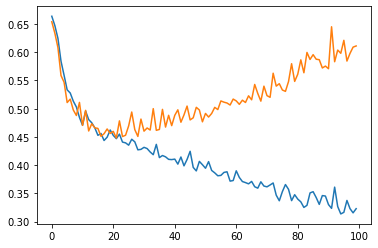

In [47]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])